In [1]:
# imports
import pandas as pd # data mangling
import matplotlib
from matplotlib import pyplot as plt
import scipy
import numpy as np
import seaborn as sns

In [2]:
df_simple = pd.read_csv('simple_concat.csv')
df_technique = pd.read_csv('technique_concat.csv')

In [3]:
display(df_simple)

,event,user_id,timestamp,time_taken_in_ms,wpm,numBksp
0,key_press,1,2021-05-17 20:20:30.880483,114,0.000000,0
1,key_press,1,2021-05-17 20:20:31.010277,128,0.000000,0
2,key_press,1,2021-05-17 20:20:31.221389,209,0.000000,0
3,key_press,1,2021-05-17 20:20:31.464978,241,0.000000,0
4,key_press,1,2021-05-17 20:20:31.680181,214,0.000000,0
...,...,...,...,...,...,...
1146,key_press,2,2021-05-17 20:40:01.552719,293,0.000000,19
1147,key_press,2,2021-05-17 20:40:06.094681,4536,0.000000,20
1148,key_press,2,2021-05-17 20:40:06.101762,0,0.000000,20
1149,key_press,2,2021-05-17 20:40:06.247967,140,0.000000,20


In [4]:
display(df_technique)

,event,user_id,timestamp,time_taken_in_ms,auto_completed,auto_completion_count,wpm,numBksp
0,key_press,1,2021-05-17 20:29:35.585373,266,False,0,NaN,0
1,key_press,1,2021-05-17 20:29:35.716303,128,False,0,NaN,0
2,key_press,1,2021-05-17 20:29:35.803294,83,False,0,NaN,0
3,key_press,1,2021-05-17 20:29:36.036551,230,False,0,NaN,0
4,key_press,1,2021-05-17 20:29:36.585378,547,False,1,NaN,0
...,...,...,...,...,...,...,...,...
967,key_press,2,2021-05-17 20:36:47.905565,0,False,18,NaN,9
968,key_press,2,2021-05-17 20:36:48.006410,90,False,18,NaN,9
969,key_press,2,2021-05-17 20:36:48.132114,109,False,18,NaN,9
970,key_press,2,2021-05-17 20:36:48.703970,562,False,18,NaN,9


# Basic Findings - Mean time taken per word

In [7]:
time_per_word_simple = df_simple[(df_simple['event'] == 'word')]['time_taken_in_ms']
time_per_word_technique = df_technique[(df_technique['event'] == 'word')]['time_taken_in_ms']


print("All values are time in ms")

mean_simple = np.mean(time_per_word_simple)
mean_technique = np.mean(time_per_word_technique)
print("Mean simple: " + str(mean_simple))
print("Mean technique: " + str(mean_technique))

std_simple = np.std(time_per_word_simple)
std_technique = np.std(time_per_word_technique)

print("STD simple: " + str(std_simple))
print("STD technique: " + str(std_technique))

max_simple = np.max(time_per_word_simple)
max_technique = np.max(time_per_word_technique)

print("Max simple: " + str(max_simple))
print("Max technique: " + str(max_technique))

min_simple = np.min(time_per_word_simple)
min_technique = np.min(time_per_word_technique)

print("Min simple: " + str(min_simple))
print("Min technique: " + str(min_technique))

All values are time in ms
Mean simple: 1012.3660130718954
Mean technique: 1255.1038961038962
STD simple: 631.1108450297537
STD technique: 760.38764181763
Max simple: 3909
Max technique: 5374
Min simple: 281
Min technique: 309


In [8]:
scipy.stats.ttest_ind(time_per_word_simple, time_per_word_technique)

Ttest_indResult(statistic=-3.032535935876729, pvalue=0.0026333446298427506)

# Boxplot- Time taken per word

In [34]:
# Concatenate the two datasets
concat = pd.concat([df_simple[(df_simple['event'] == 'word')].assign(dataset='simple'), df_technique[(df_technique['event'] == 'word')].assign(dataset='technique')])

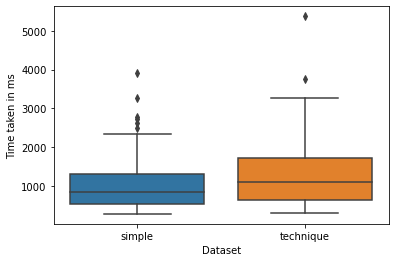

In [35]:
plot = sns.boxplot(
    data = concat,
    x = "dataset",
    y = "time_taken_in_ms"
)
plot.set(xlabel = "Dataset", ylabel = "Time taken in ms")

plt.show()

# Boxplot - words per minute

In [36]:
# Concatenate the two datasets
concat = pd.concat([df_simple[(df_simple['event'] == 'sentence')].assign(dataset='simple'), df_technique[(df_technique['event'] == 'sentence')].assign(dataset='technique')])

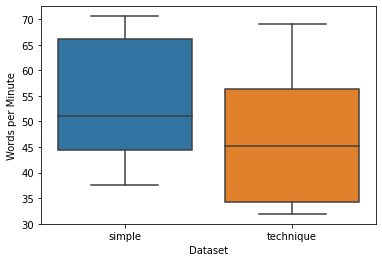

In [38]:
plot = sns.boxplot(
    data = concat,
    x = "dataset",
    y = "wpm"
)
plot.set(xlabel = "Dataset", ylabel = "Words per Minute")

plt.show()

# Usage of auto completion

In [46]:
df_technique_words = df_technique[(df_technique['event'] == 'word')]
df_auto_completed = df_technique_words[df_technique_words['auto_completed'] == True]
df_not_completed = df_technique_words[df_technique_words['auto_completed'] == False]

num_auto_completed = len(df_auto_completed.index)
num_not_completed = len(df_not_completed.index)

print("Auto completed words: " + str(num_auto_completed))
print("Manually completed words: " + str(num_not_completed))



Auto completed words: 141
Manually completed words: 13
